<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks/Kaggle'

In [5]:
!kaggle datasets download -d marshuu/breast-cancer

  0% 0.00/3.37k [00:00<?, ?B/s]
100% 3.37k/3.37k [00:00<00:00, 3.25MB/s]


In [7]:
!unzip '/content/breast-cancer.zip' && rm '/content/breast-cancer.zip'

unzip:  cannot find or open /content/breast-cancer.zip, /content/breast-cancer.zip.zip or /content/breast-cancer.zip.ZIP.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [9]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023/breast_cancer.csv')
data.head(2)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [13]:
data.shape

(683, 10)

In [14]:
data.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

Text(0.5, 1.0, 'Correlation between columns to find Class of cancer')

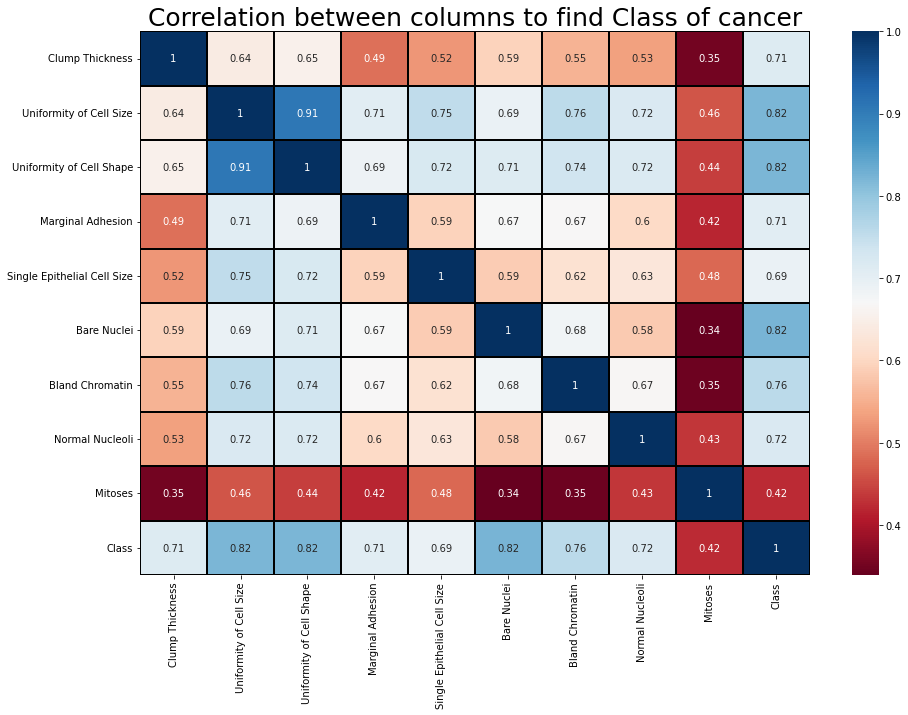

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), linecolor='black', linewidths=2, annot=True, cmap='RdBu' )
plt.title("Correlation between columns to find Class of cancer", fontsize=25)

In [42]:
pie =data.groupby(["Class"])["Clump Thickness"].count()
pie

Class
2    444
4    239
Name: Clump Thickness, dtype: int64

Text(0.5, 1.0, 'Types of Cancer after exams')

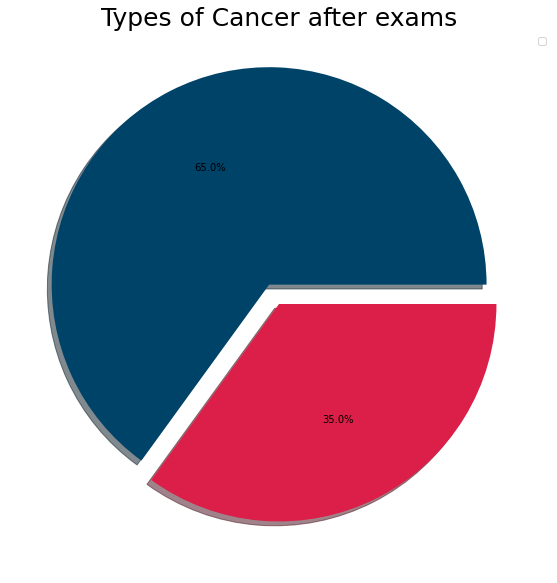

In [56]:
colors = ['#004369','#DB1F48']
explode =[0.1,0]
plt.figure(figsize=(10,10))
plt.pie(pie.values, autopct='%.1f%%', colors=colors, explode=explode, shadow=True)
plt.legend()
plt.title("Types of Cancer after exams", fontsize=25)

# **Machine Learning Models**

In [58]:
x = np.array(data[['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses']])
y = np.array(data[ 'Class'])

In [59]:
print(x.shape,'\n',y.shape)

(683, 9) 
 (683,)


In [60]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.2,
                                                 random_state=42)

In [61]:
print(x_train.shape,'\n',y_train.shape)

(546, 9) 
 (546,)


In [62]:
print(
    'Clump Thickness: ',data['Clump Thickness'].min(),data['Clump Thickness'].max(),'\n',
    'Uniformity of Cell Size: ',data['Uniformity of Cell Size'].min(),data['Uniformity of Cell Size'].max(),'\n',
    'Uniformity of Cell Shape: ',data['Uniformity of Cell Shape'].min(),data['Uniformity of Cell Shape'].max(),'\n',
    'Marginal Adhesion: ',data['Marginal Adhesion'].min(),data['Marginal Adhesion'].max(),'\n',
    'Single Epithelial Cell Size: ',data['Single Epithelial Cell Size'].min(),data['Single Epithelial Cell Size'].max(),'\n',
    'Bare Nuclei: ',data['Bare Nuclei'].min(),data['Bare Nuclei'].max(),'\n',
    'Bland Chromatin: ',data['Bland Chromatin'].min(),data['Bland Chromatin'].max(),'\n',
    'Normal Nucleoli: ',data['Normal Nucleoli'].min(),data['Normal Nucleoli'].max(),'\n',
    'Mitoses: ',data['Mitoses'].min(),data['Mitoses'].max(),'\n'
    )

Clump Thickness:  1 10 
 Uniformity of Cell Size:  1 10 
 Uniformity of Cell Shape:  1 10 
 Marginal Adhesion:  1 10 
 Single Epithelial Cell Size:  1 10 
 Bare Nuclei:  1 10 
 Bland Chromatin:  1 10 
 Normal Nucleoli:  1 10 
 Mitoses:  1 10 



In [72]:
from sklearn.linear_model import LinearRegression

#features: Clump Thickness:  1 10, Uniformity of Cell Size:  1 10 , Uniformity of Cell Shape:  1 10 , Marginal Adhesion:  1 10
#Single Epithelial Cell Size:  1 10 , Bare Nuclei:  1 10 , Bland Chromatin:  1 10 , Normal Nucleoli:  1 10 , Mitoses:  1 10 

features =np.array([[9,10,10,1,10,8,3,3,1]])

r = LinearRegression()
r.fit(x_train,y_train)
lr = r.predict(features)
lr

array([3.95898784])

In [71]:
from sklearn.ensemble import RandomForestRegressor

#features: Clump Thickness:  1 10, Uniformity of Cell Size:  1 10 , Uniformity of Cell Shape:  1 10 , Marginal Adhesion:  1 10
#Single Epithelial Cell Size:  1 10 , Bare Nuclei:  1 10 , Bland Chromatin:  1 10 , Normal Nucleoli:  1 10 , Mitoses:  1 10 

features =np.array([[9,10,10,1,10,8,3,3,1]])

rf = RandomForestRegressor()
rf.fit(x_train,y_train) 
rfr = rf.predict(features)
rfr

array([3.88])

In [70]:
from sklearn.svm import SVR

#features: Clump Thickness:  1 10, Uniformity of Cell Size:  1 10 , Uniformity of Cell Shape:  1 10 , Marginal Adhesion:  1 10
#Single Epithelial Cell Size:  1 10 , Bare Nuclei:  1 10 , Bland Chromatin:  1 10 , Normal Nucleoli:  1 10 , Mitoses:  1 10 

features =np.array([[9,10,10,1,10,8,3,3,1]])

rs = SVR()
rs.fit(x_train,y_train) 
SvR = rs.predict(features)
SvR

array([3.90013841])

In [69]:
from sklearn.neighbors import KNeighborsRegressor

#features: Clump Thickness:  1 10, Uniformity of Cell Size:  1 10 , Uniformity of Cell Shape:  1 10 , Marginal Adhesion:  1 10
#Single Epithelial Cell Size:  1 10 , Bare Nuclei:  1 10 , Bland Chromatin:  1 10 , Normal Nucleoli:  1 10 , Mitoses:  1 10 

features =np.array([[9,10,10,1,10,8,3,3,1]])

rk = KNeighborsRegressor()
rk.fit(x_train,y_train)
knr = rk.predict(features)
knr

array([4.])

In [68]:
data.iloc[60,]

Clump Thickness                 9
Uniformity of Cell Size        10
Uniformity of Cell Shape       10
Marginal Adhesion               1
Single Epithelial Cell Size    10
Bare Nuclei                     8
Bland Chromatin                 3
Normal Nucleoli                 3
Mitoses                         1
Class                           4
Name: 60, dtype: int64